# Time Series
A time series model is one that attempts to relate the value of a variable(s) at one time point with values of the variable(s) at previous time points, for example,
$$GNP_{t+1} = f (GNP_t ,GNP_{t−1},GNP_{t−2},...)+ \text{Error}.$$
Here, $t$ denotes the time. Thus “simple” time series models, like the one above, are “black-box”.
More complex time series models are explanatory in that they try to relate the value of the variable of interest not simply with its previous values but also with previous values of other “explanatory” variables.


In [1]:
#Importing required libraries
from pandas import read_excel
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

Australian monthly electricity production, displays a clear trend and
seasonality. The code cell below loads the datasets into a pandas dataframe, and plots it.

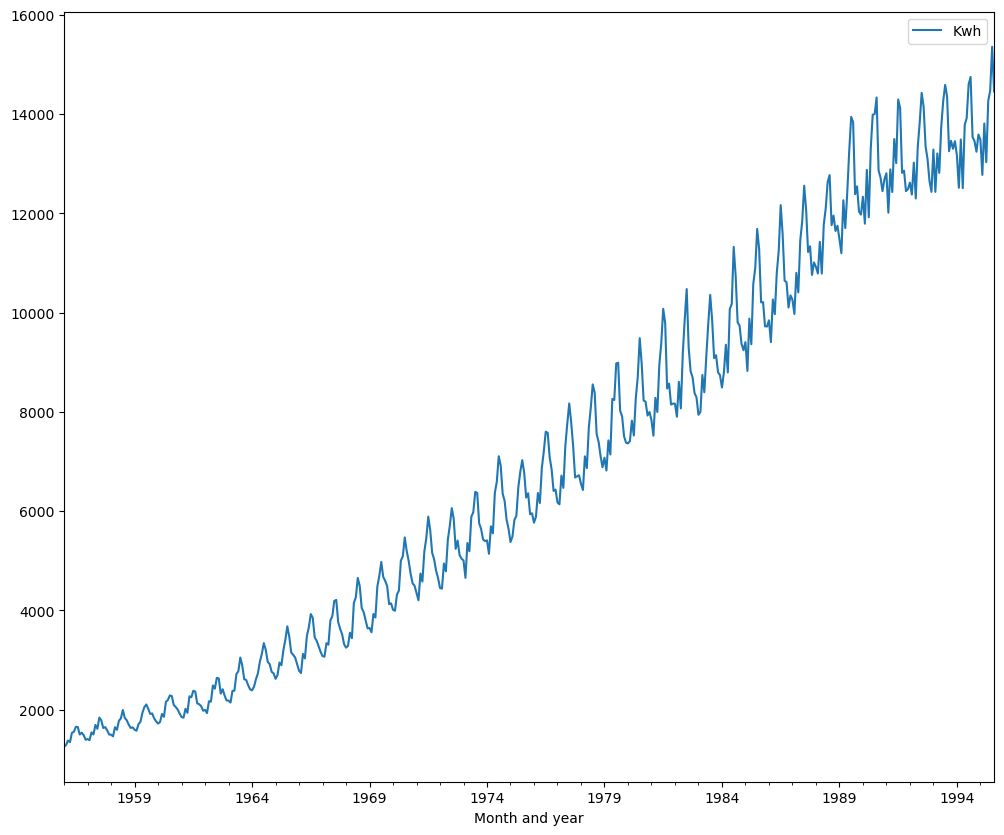

In [3]:
fig, ax = plt.subplots(figsize=(12,10))
series = read_excel('Electricity.xls', sheet_name='Data', header=0, index_col=0, parse_dates=True)
series.plot(ax=ax)
plt.show()

Here below, seasonal graphs are produced and plotted for the same dataset.

/var/folders/y6/x6g0z9xj0zl2s94zlqjt2prw0000gn/T/ipykernel_98105/563438545.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = read_excel('Electricity.xls', sheet_name='SeasData', header=0, index_col=0, parse_dates=True)


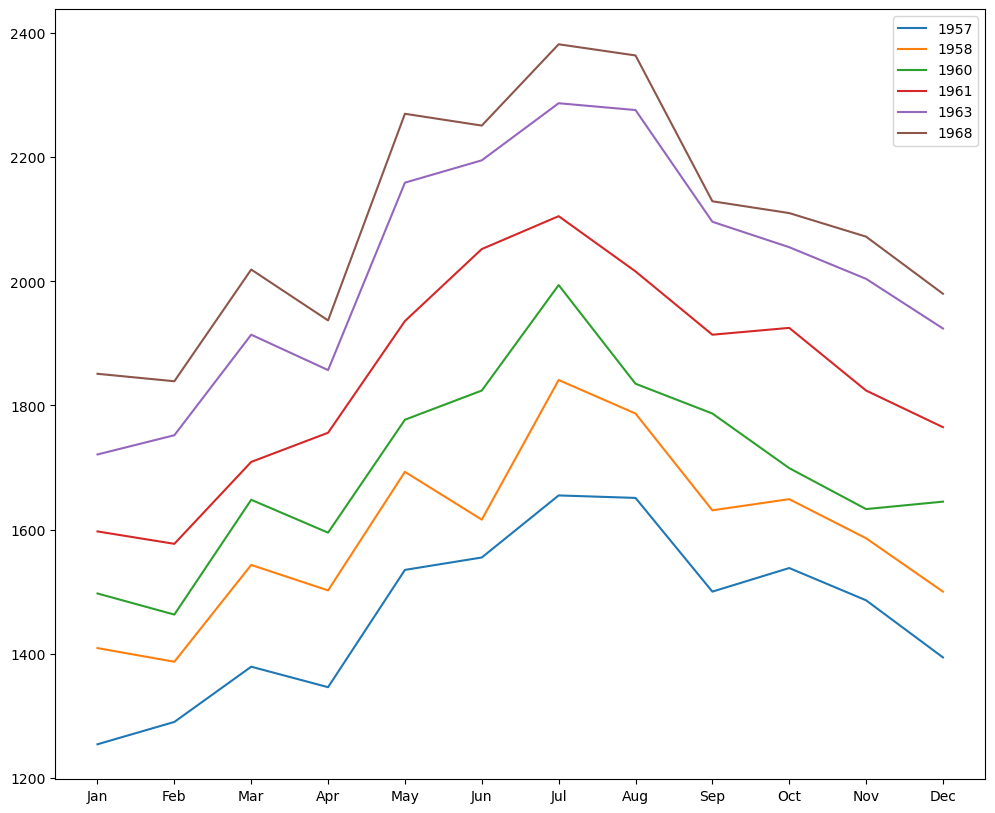

In [4]:
# to show the seasonality trend
series = read_excel('Electricity.xls', sheet_name='SeasData', header=0, index_col=0, parse_dates=True)
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
months = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots(figsize=(12,10))
for column in series.columns:
    plt.plot(x, series[column])

plt.xticks(x, months)
years = [1957,1958, 1960, 1961, 1963, 1968]
plt.legend(years)

plt.show()

The following bricks production data in Australia does not show a clear trend

In the cell below, following the previous example, load the dataset contained in the 'ClayBricks.xls' file into a pandas dataframe, and plot it, to visually look for trends and variations. The data corresponds to the Australian clay brick production.

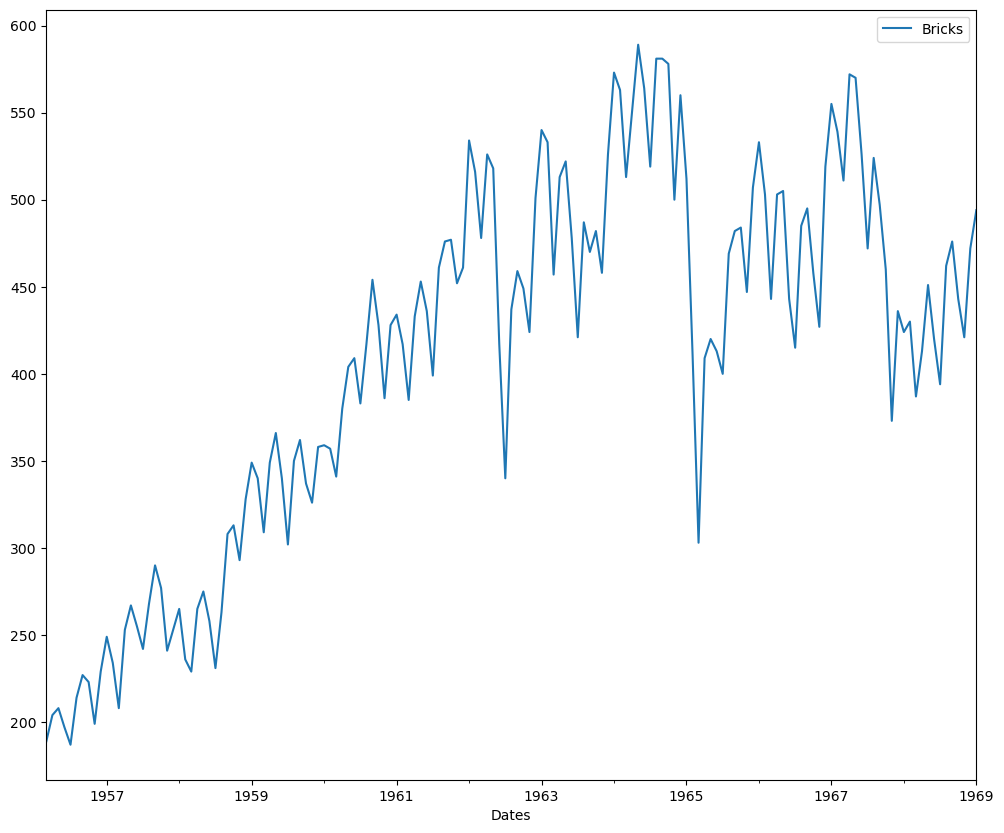

In [5]:
fig, ax = plt.subplots(figsize=(12,10))
series = read_excel('ClayBricks.xls', sheet_name='BRICKSQ', header=0, index_col=0, parse_dates=True)
series.plot(ax=ax)
plt.show()

Australian clay brick production contains occasional large fluctuations which
are difficult to explain, and hence predict, without knowing the underlying causes. In the cell below, optain and plot the seasonal graphs. 

/var/folders/y6/x6g0z9xj0zl2s94zlqjt2prw0000gn/T/ipykernel_98105/2168571642.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = read_excel('ClayBricks.xls',  sheet_name='SeasonalData', header=0, index_col=0, parse_dates=True)


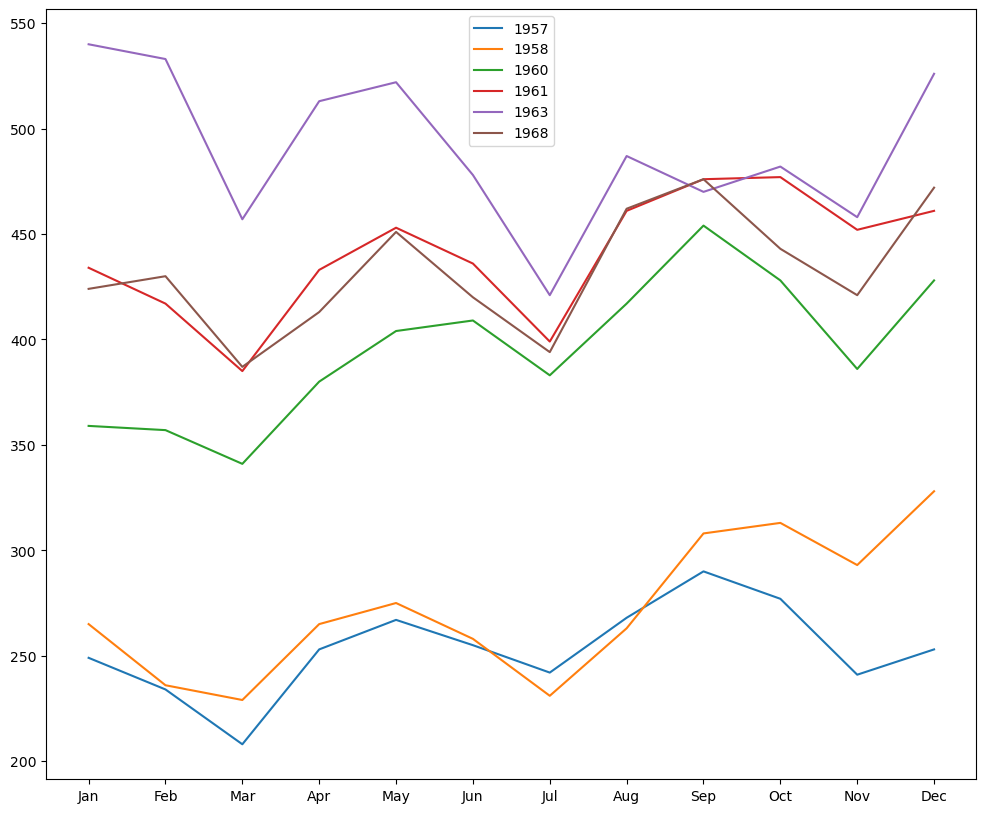

In [6]:
series = read_excel('ClayBricks.xls',  sheet_name='SeasonalData', header=0, index_col=0, parse_dates=True)
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
months = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots(figsize=(12,10))
for column in series.columns:
    plt.plot(x, series[column])

plt.xticks(x, months)
years = [1957,1958, 1960, 1961, 1963, 1968]
plt.legend(years)

plt.show()

# Correlation
$Cov_{XY} = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})$

$Cov_{XY}$ represents the covariance between X and Y.
n is the number of observations.
$X_i$ and $Y_i$ are the individual observations of X and Y, respectively.
$\bar{X}$ and $\bar{Y}$ are the means of X and Y, respectively.
The sum is taken over all n observations.

Pearson's correlation coefficient is defined as $r_{XY} = \frac{Cov_{XY}}{S_X S_Y} = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n}(X_i - \bar{X})^2} \sqrt{\sum_{i=1}^{n}(Y_i - \bar{Y})^2}}$, where n is the number of observations.
$X_i$ and $Y_i$ are the individual observations of X and Y, respectively.
$\bar{X}$ and $\bar{Y}$ are the means of X and Y, respectively.
$S_X$ and $S_Y$ are the standard deviations of X and Y, respectively.
The sum is taken over all n observations.


Here below, some bank data with four features, labeled as DEOM, AAA, Tto4, D3to4 is loaded, and the variable-by variable correlation plots and coefficent produced.

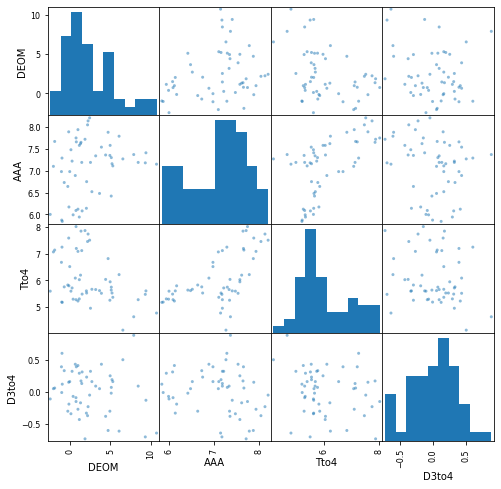

           DEOM       AAA      Tto4     D3to4
DEOM   1.000000  0.256840 -0.391274 -0.194680
AAA    0.256840  1.000000  0.587047 -0.203849
Tto4  -0.391274  0.587047  1.000000 -0.201443
D3to4 -0.194680 -0.203849 -0.201443  1.000000


In [46]:
# Covariance matrix
series = read_excel('Bank.xls', sheet_name='Data3', header=0,
                     dtype=float)

#Plotting the scatter plots of each variable against the other one
pd.plotting.scatter_matrix(series, figsize=(8, 8))
plt.show()

# Correlation matrix for all the variables, 2 by 2
CorrelationMatrix = series.corr()
print(CorrelationMatrix)

Here below, automobile data of 19 Japanese cars is loaded, and the correlation between mileage and price is computed.

In [8]:
# Correlation calculation
series1 = read_excel('JapaneseCars.xls', sheet_name='Data', header=0,
                      dtype=float)
correlval=np.corrcoef(series1['Mileage'], series1['Price'])
correlval=correlval[1,0]
print(correlval)

-0.7277246246668201


Now, compute manually using numpy the same Pearson's correlation coefficient. To obtain a numpy array from a column of a pandas dataframe, you can for example do `mileage_array = series1['Mileage'].to_numpy()`

In [9]:
num = series1['Mileage'].to_numpy()
np.sum((series1['Mileage'] - series1['Mileage'].mean()) * (series1['Price'] - series1['Price'].mean())) / np.sqrt(((series1['Mileage'] - series1['Mileage'].mean())**2).sum() * ((series1['Price'] - series1['Price'].mean())**2).sum())

-0.7277246246668201

Here below, following the example discussed in the slides this morning, compute instead Spearman's correlation coefficient. You can use for insance scipy's or panda's built-in functions for that.

In [ ]:
# add your code here

Below, seasonal plots and the autocorrelation function (ACF) plot are shown for a cement production dataset.

/var/folders/y6/x6g0z9xj0zl2s94zlqjt2prw0000gn/T/ipykernel_98105/3425680539.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series1 = read_excel('CementProduction.xls', sheet_name='Data', header=0,
/var/folders/y6/x6g0z9xj0zl2s94zlqjt2prw0000gn/T/ipykernel_98105/3425680539.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series2 = read_excel('CementProduction.xls', sheet_name='SeasonalData', header=0,


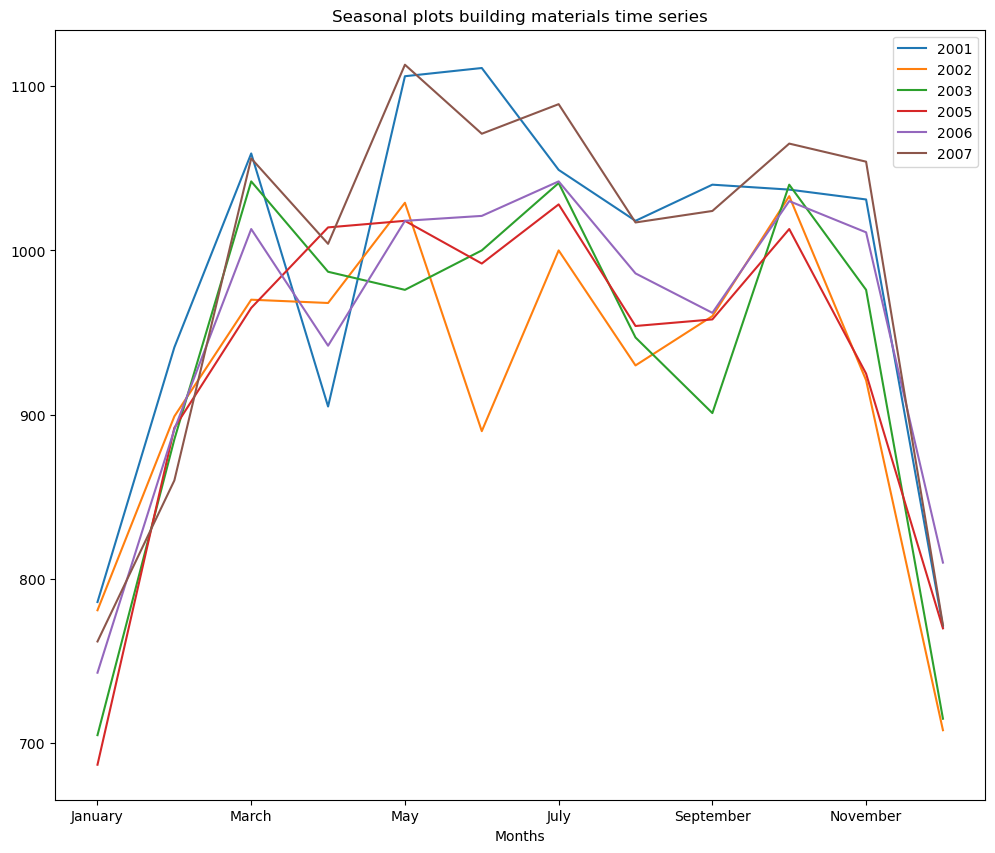

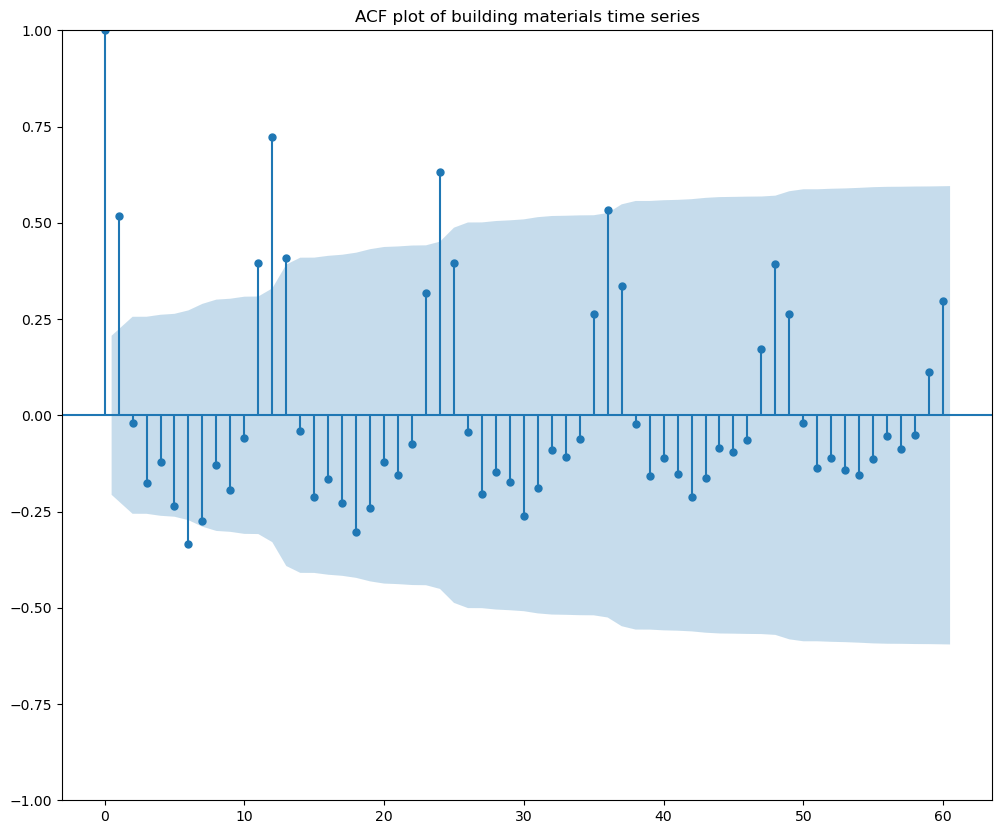

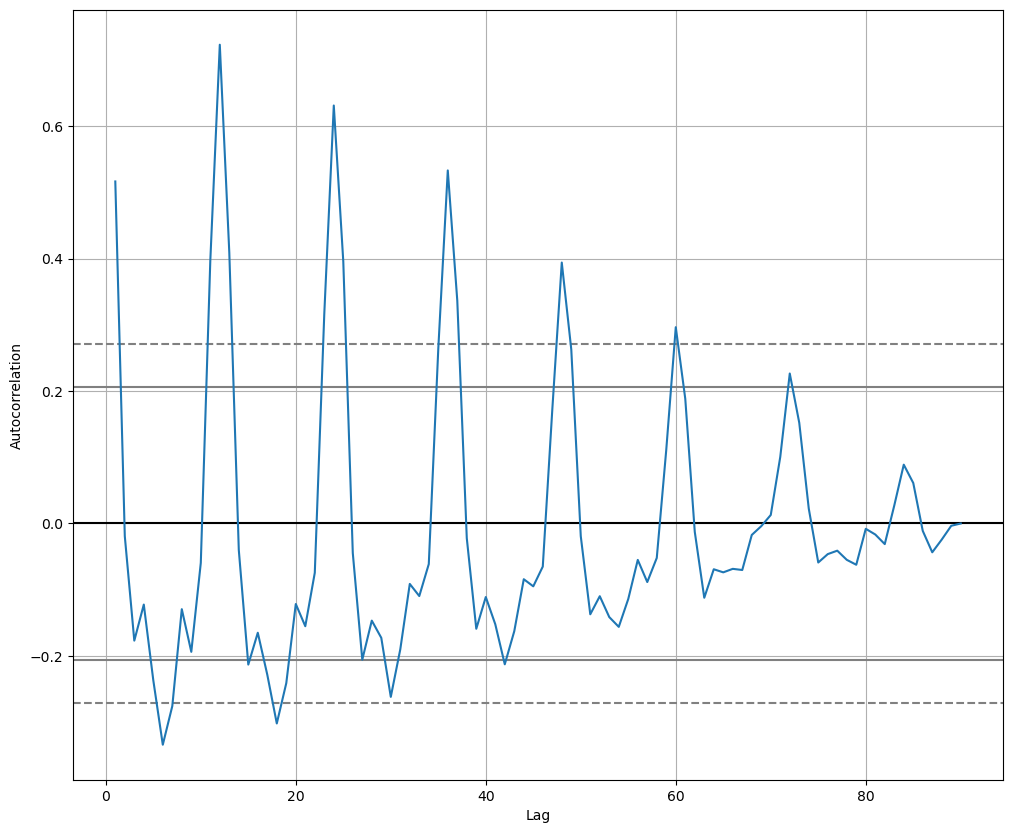

In [12]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
series1 = read_excel('CementProduction.xls', sheet_name='Data', header=0,
              index_col=0, parse_dates=True)
series2 = read_excel('CementProduction.xls', sheet_name='SeasonalData', header=0,
                    index_col=0, parse_dates=True)
fig, ax = plt.subplots(figsize=(12,10))
series2.plot(title='Seasonal plots building materials time series', ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(12,10))
plot_acf(series1, title='ACF plot of building materials time series', lags=60, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(12,10))
autocorrelation_plot(series1, ax=ax)
plt.show()

Now, use statsmodel to compute the ACF for 90 lags. Plot the results and compare to the previous plot: you should obptain the same graph.

Documentation on statsamodel: https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html


[ 1.          0.51653941 -0.01919685 -0.17693485 -0.12242265 -0.23677028
 -0.33410936 -0.27575536 -0.12943079 -0.19381842 -0.05949076  0.3965731
  0.72304361  0.40920654 -0.03999368 -0.21310272 -0.16501606 -0.22841371
 -0.30201311 -0.24102564 -0.12159853 -0.15514246 -0.0744062   0.31665294
  0.63124514  0.39563663 -0.04458057 -0.20563425 -0.14669002 -0.17269283
 -0.26188086 -0.19005182 -0.0912736  -0.10957901 -0.0613119   0.26370001
  0.53319668  0.33653792 -0.02212058 -0.15901645 -0.11106366 -0.15216887
 -0.2126718  -0.16263189 -0.08417232 -0.09490038 -0.0651012   0.17147043
  0.394079    0.26282997 -0.01922539 -0.13712992 -0.10982679 -0.14136596
 -0.15612474 -0.11398209 -0.05499559 -0.08842858 -0.0519997   0.11148683
  0.29644219  0.18837184 -0.0125739  -0.11214837 -0.06911851 -0.07378173
 -0.06850658 -0.07022908 -0.0173213  -0.00403571  0.01286286  0.10057371
  0.22648533  0.15202641  0.02253771 -0.05892811 -0.04624334 -0.0410535
 -0.05486233 -0.06232944 -0.00803738 -0.01662032 -0.0

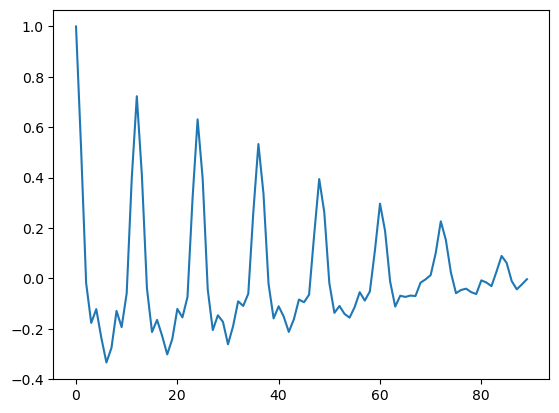

In [22]:
from statsmodels.tsa.stattools import acf
ACF = acf(series1,nlags=90)
print(ACF)
plt.plot(range(len(ACF)),ACF)
plt.show()

# Decomposition
The basic approach in analysing the underlying structure of a time series is to decompose it as
$$Y_t = f (S_t ,T_t ,E_t ),$$
where $Y_t$ is the observed value at time $t$ and the variables are defined as follows:
- $S_t$ is the seasonal component at time $t$;
- $T_t$ is the trend-cycle component at time $t$;
- $E_t$ is an irregular (random) component at time $t$.


# Additive Decomposition

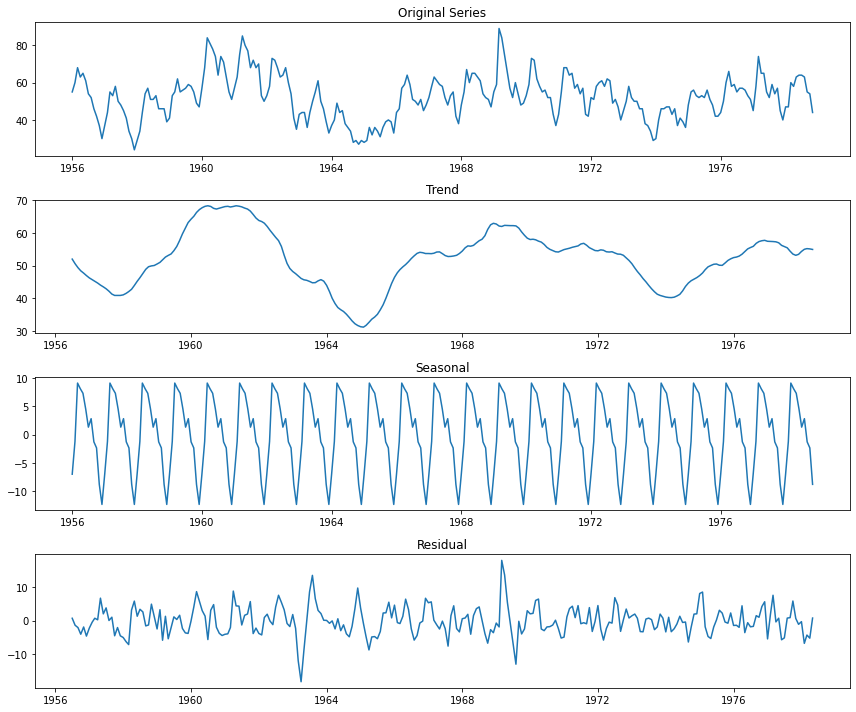

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

series = read_excel('HouseSales.xls', sheet_name='Data', header=0, index_col=0, parse_dates=True)
result = seasonal_decompose(series, model='additive')

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10))

# Plot original series
ax1.plot(result.observed)
ax1.set_title('Original Series')

# Plot trend component
ax2.plot(result.trend)
ax2.set_title('Trend')

# Plot seasonal component
ax3.plot(result.seasonal)
ax3.set_title('Seasonal')

# Plot residual component
ax4.plot(result.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()


# Multiplicative Decomposition

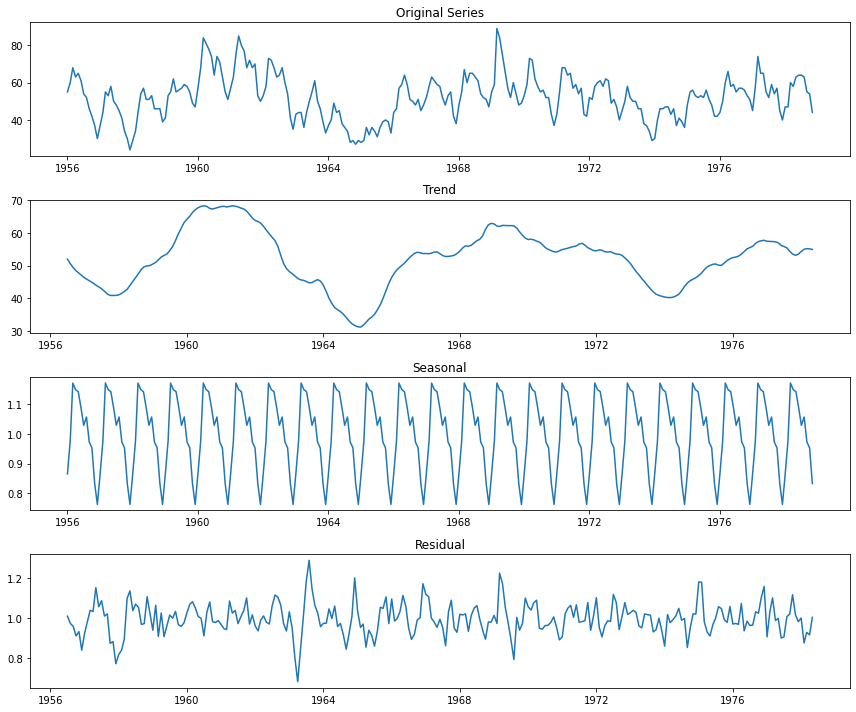

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

series = read_excel('HouseSales.xls', sheet_name='Data', header=0, index_col=0, parse_dates=True)
result = seasonal_decompose(series, model='multiplicative')

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10))

# Plot original series
ax1.plot(result.observed)
ax1.set_title('Original Series')

# Plot trend component
ax2.plot(result.trend)
ax2.set_title('Trend')

# Plot seasonal component
ax3.plot(result.seasonal)
ax3.set_title('Seasonal')

# Plot residual component
ax4.plot(result.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()
